In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000328_08_03_180.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000223_09_02_146.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000229_03_04_202.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_01_01_104.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_12_01_075.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000143_04_02_153.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/002276_05_03_078.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000020_03_01_166.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000054_03_01_025.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_04_01_242.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_170.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_195.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_03_02_166.png
/kaggle/inpu

Importing Neccessary Libraries for working with Lung Cancer Data

In [18]:
import torch
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset

Showing one example image from the Lung Cancer Dataset

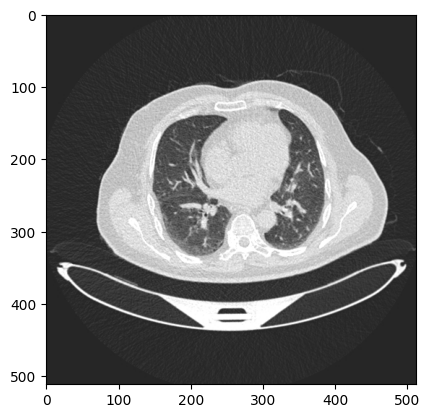

In [15]:
img = read_image('/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg')
img = T.ToPILImage()(img)

plt.imshow(img, cmap="gray")
plt.show()

# display the image
#img.show()

Creating a Lung Cancer Dataset, that labels the images based off of their parent directory

In [42]:
class LungDataSet(Dataset):
    def __init__(self, input_path, labels = []):
        self.path = input_path
        self.label = labels
        self.b_dir = os.path.join(self.path, self.label[0])
        self.m_dir = os.path.join(self.path, self.label[1])
        self.n_dir = os.path.join(self.path, self.label[2])

    
    def __len__(self):
        
        b_len = len([name for name in os.listdir(self.b_dir) if os.path.isfile(os.path.join(self.b_dir, name))])
        m_len = len([name for name in os.listdir(self.m_dir) if os.path.isfile(os.path.join(self.m_dir, name))])
        n_len = len([name for name in os.listdir(self.n_dir) if os.path.isfile(os.path.join(self.n_dir, name))])
        return (b_len + m_len + n_len)
       
    
    def __getitem__(self, file_name):
        
        
        
        if file_name in os.listdir(self.b_dir):
            label = "Bengin"
            img = read_image(os.path.join(self.b_dir, file_name))
            img = T.ToPILImage()(img)

            plt.imshow(img)
            plt.show()
            return img,label
            
        
        elif file_name in os.listdir(self.m_dir):
            label = "Malignant"
            img = read_image(os.path.join(self.m_dir, file_name))
            img = T.ToPILImage()(img)

            plt.imshow(img)
            plt.show()
            return img,label
        
        elif file_name in os.listdir(self.n_dir):
            label = "Normal"
            img = read_image(os.path.join(self.n_dir, file_name))
            img = T.ToPILImage()(img)

            plt.imshow(img)
            plt.show()
            return img,label
            
        else:
            label = "File not in Dataset"
            return label
            
         
        
        
        
        
        
        
        
        
        
        
        
        
        

Creating labels and providing file path of the data, to create Lung Dataset

In [43]:
labels = ["Bengin cases", "Malignant cases", "Normal cases"]
path = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
Lungs = LungDataSet(path, labels)

Displaying a labeled image, in this case a Malignant case

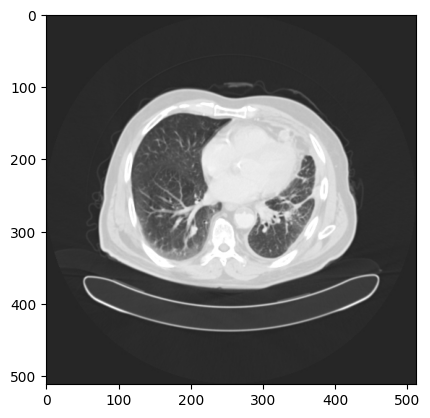

(<PIL.Image.Image image mode=RGB size=512x512>, 'Malignant')

In [44]:
Lungs['Malignant case (1).jpg']

Also displaying how many images are in the dataset in total

In [26]:
len(Lungs)

1097